Notre objectif est d'aider les gynécologues à déterminer les facteurs à risque d’accouchement prématuré et pouvoir entre autre de savoir si la future maman en question aura réellement besoin d’un accouchement prématuré.



In [0]:
import pandas as pd
import numpy as np

Le fichier "Accouchement.xls" porte sur les facteurs prénataux (médicaux et de personne) liés à un accouchement prématuré chez les femmes déjà en travail prématuré.


 Télécharger les données 

In [0]:
from google.colab import files
data_to_load = files.upload()

#import io
#df = pd.read_csv(io.BytesIO(data_to_load['Accouchement.csv']))

Saving Accouchement.xls to Accouchement (2).xls


In [0]:
import io
dt = pd.read_excel(io.BytesIO(data_to_load['Accouchement.xls']), sep=";", header=0)

GEST: l'âge gestationnel en semaines à l'entrée dans l'étude DILATE: la dilatation du col en cm EFFACE: l’effacement du col (en %) CONSIS: la consistance du col (1= mou, 2= moyen, 3=ferme) CONTR: la présence (=1) ou non (=2) de contraction MEMBRAN: les membranes rupturées (=1) ou non (=2) ou incertain (=3) AGE: l’âge de la patiente STRAT: période de la grossesse GRAVID: la gestité (nombre de grossesses antérieures y compris celle en cours) PARIT: la parité (nombre de grossesses à terme antérieures) DIAB: la présence (=1) ou non (=2) d'un problème de diabète, ou valeur manquante (=9) BEBAGE: âge gestationnel (en jours) du bébé à la naissance TRANSF: le transfert (1) ou non (2) vers un hôpital en soins spécialisés GEMEL: grossesse simple (=1) ou multiple (=2) 

In [0]:
dt.head()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0,2,1,1,positif


# 13 variables ont été retenues pour 390 femmes enrôlées dans l'étude.

In [0]:
print(dt.shape)

(390, 14)


In [0]:
print(dt['PREMATURE'].unique())

['positif' 'negatif']


In [0]:
print(dt.groupby('PREMATURE').size())

PREMATURE
negatif    124
positif    266
dtype: int64


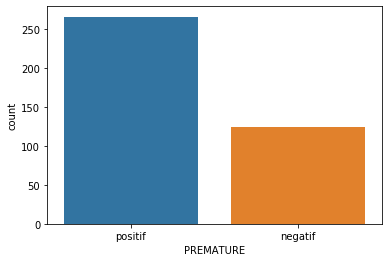

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(dt['PREMATURE'],label="Count")
plt.show()

#Diviser les données en données d'apprentissage et données de test 

In [0]:
X= dt.iloc[:,0:13].values
y= pd.factorize(dt['PREMATURE'])[0]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Centrage Réduction des données avec la méthode  MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Les arbres de décision: Appliquer CART 

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [0]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of CART classifier on training set: 0.77
Accuracy of CART classifier on test set: 0.74


In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
export_graphviz(dtc_model, out_file=dot_data)
#graph=pydot.graph_from_dot_data(dot_data.getvalue())
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")


In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

[[54 11]
 [20 13]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        65
           1       0.54      0.39      0.46        33

    accuracy                           0.68        98
   macro avg       0.64      0.61      0.62        98
weighted avg       0.67      0.68      0.67        98

